First Steps

In [2]:
url = "https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset"

In [3]:
import os
from PIL import Image

In [4]:
import kagglehub
import tensorflow as tf

In [5]:
dataset_path = '/kaggle/input/trash-type-image-dataset/TrashType_Image_Dataset'

# Retrieve the names of all folders (representing trash types) within the dataset directory
garbage_types = os.listdir(dataset_path)

# Set to store unique image dimensions for the entire dataset
all_dimensions_set = set()

# Iterate over each trash type (folder) to process images
for garbage_type in garbage_types:
    folder_path = os.path.join(dataset_path, garbage_type)
    
    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        
        # Display the count of images in the current folder
        num_images = len(image_files)
        print(f"{garbage_type} folder contains {num_images} images.")
        
        # Loop over each image to check its dimensions
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                # Extract the width, height, and channels (color depth) of the image and add to the dimensions set
                width, height = img.size
                channels = len(img.getbands())
                all_dimensions_set.add((width, height, channels))
                
# Determine if all images in the entire dataset have the same dimensions 
if len(all_dimensions_set) == 1: 
    width, height, channel = all_dimensions_set.pop()
    print(f"\nAll images in the dataset have the same dimensions: {width}x{height} with {channels} color channels.")
else:
    print("\nThe images in the dataset have different dimensions or color channels.")

metal folder contains 410 images.
glass folder contains 501 images.
paper folder contains 594 images.
trash folder contains 137 images.
cardboard folder contains 403 images.
plastic folder contains 482 images.

All images in the dataset have the same dimensions: 512x384 with 3 color channels.


In [6]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [8]:
img = load_img(f"{dataset_path}/cardboard/cardboard_001.jpg")
x = img_to_array(img)/255  # We divide the pixel value by 255 to end up between 0 and 1

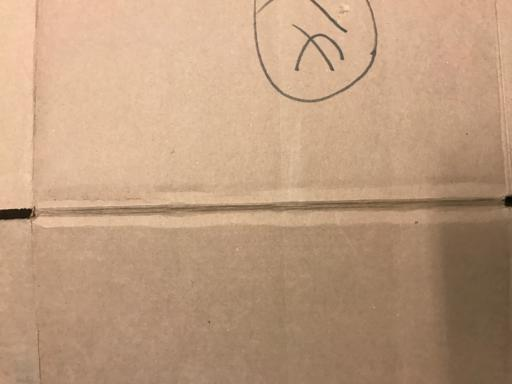

In [9]:
img

In [10]:
img = load_img(f"{dataset_path}/trash/trash_005.jpg")

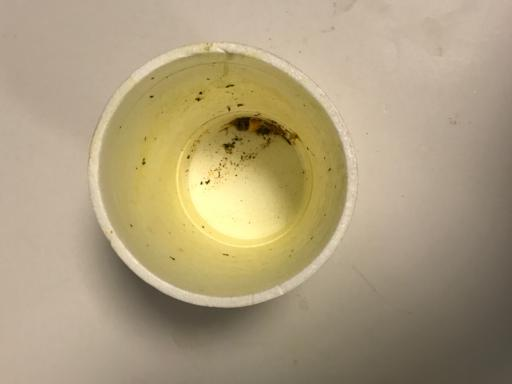

In [11]:
img

In [12]:
from random import sample
import pandas as pd

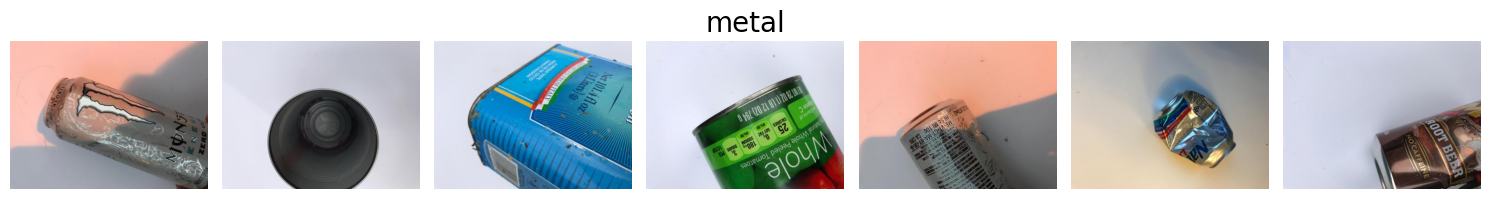

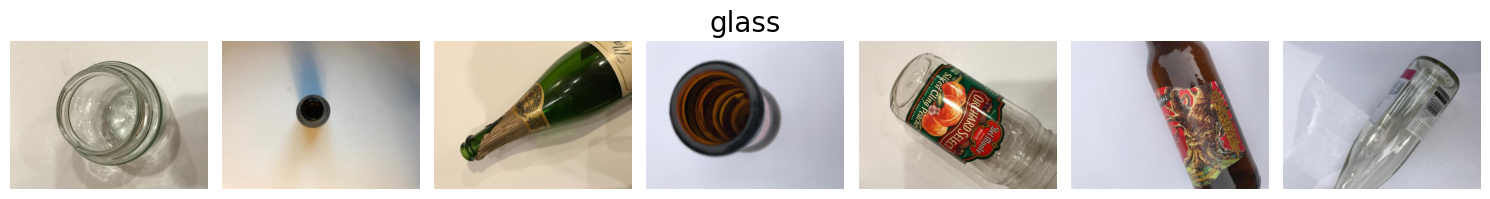

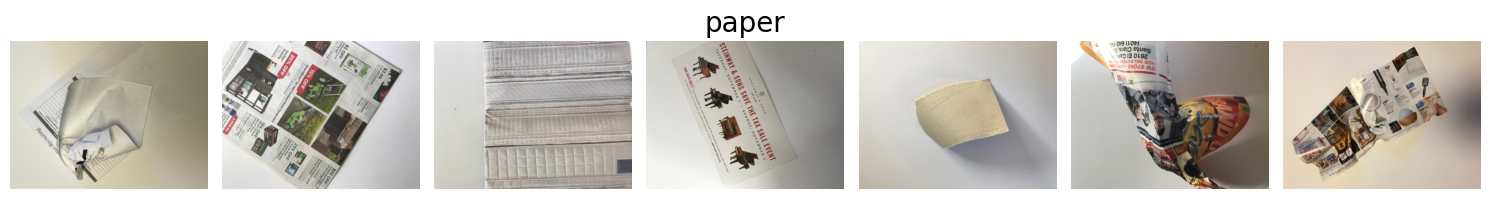

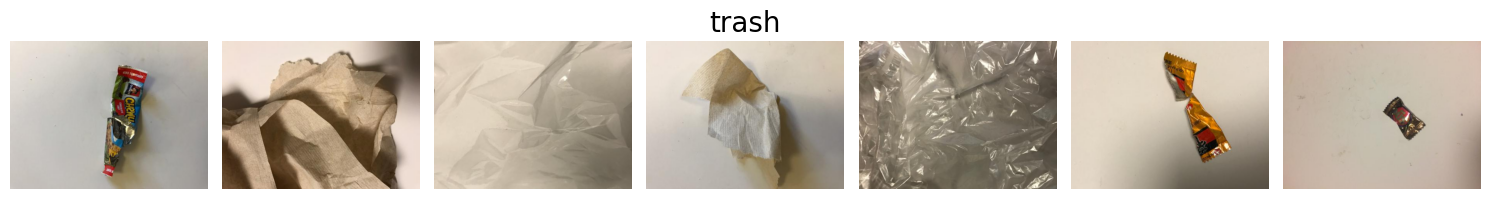

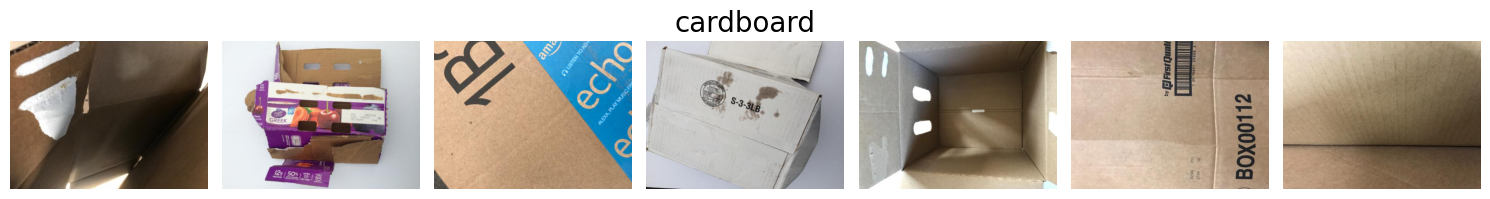

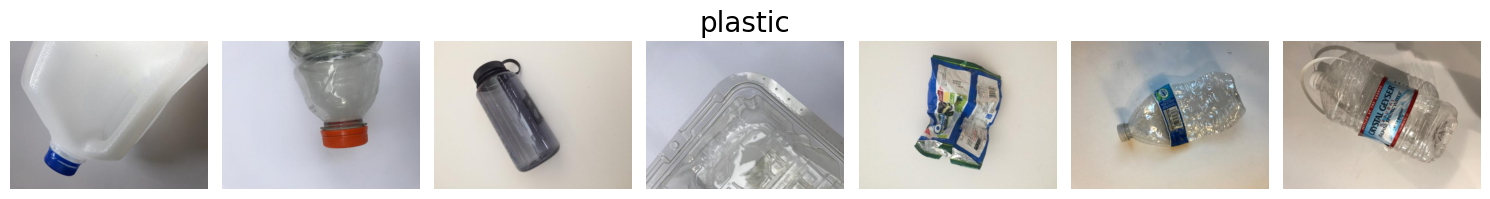

In [13]:
# Iterate over each trash type (folder) to display images
for garbage_type in garbage_types:
    folder_path = os.path.join(dataset_path, garbage_type)
    
    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        
        # Select 7 random images
        image_files = sample(image_files,7)
        
        # Set up subplots
        fig, axs = plt.subplots(1, 7, figsize=(15, 2))
        
        for i, image_file in enumerate(image_files):
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                axs[i].imshow(img)
                axs[i].axis('off')
        
        plt.tight_layout()
        fig.suptitle(garbage_type, fontsize=20, y=1.03)
        plt.show()

In [14]:
# Initialize an empty list to store image file paths and their respective labels
data = []

# Loop through each garbage type and collect its images' file paths
for garbage_type in garbage_types:
    for file in os.listdir(os.path.join(dataset_path, garbage_type)):
        # Append the image file path and its trash type (as a label) to the data list
        data.append((os.path.join(dataset_path, garbage_type, file), garbage_type))

# Convert the collected data into a DataFrame
df = pd.DataFrame(data, columns=['filepath', 'label'])

# Display the first few entries of the DataFrame
df.head()

,filepath,label
0,/kaggle/input/trash-type-image-dataset/TrashTy...,metal
1,/kaggle/input/trash-type-image-dataset/TrashTy...,metal
2,/kaggle/input/trash-type-image-dataset/TrashTy...,metal
3,/kaggle/input/trash-type-image-dataset/TrashTy...,metal
4,/kaggle/input/trash-type-image-dataset/TrashTy...,metal


In [15]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks

In [16]:
from tensorflow.keras.utils import image_dataset_from_directory

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Split with stratification
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Print the number of images in each set
print(f"Number of images in the training set: {len(train_df)}")
print(f"Number of images in the validation set: {len(val_df)}")

Number of images in the training set: 2021
Number of images in the validation set: 506


In [19]:
# 1. Class distribution in the entire dataset
overall_distribution = df['label'].value_counts(normalize=True) * 100

# 2. Class distribution in the training set
train_distribution = train_df['label'].value_counts(normalize=True) * 100

# 3. Class distribution in the validation set
val_distribution = val_df['label'].value_counts(normalize=True) * 100

print("Class distribution in the entire dataset:\n")
print(overall_distribution.round(2))
print('-'*40)

print("\nClass distribution in the training set:\n")
print(train_distribution.round(2))
print('-'*40)

print("\nClass distribution in the validation set:\n")
print(val_distribution.round(2))

Class distribution in the entire dataset:

label
paper        23.51
glass        19.83
plastic      19.07
metal        16.22
cardboard    15.95
trash         5.42
Name: proportion, dtype: float64
----------------------------------------

Class distribution in the training set:

label
paper        23.50
glass        19.84
plastic      19.05
metal        16.23
cardboard    15.93
trash         5.44
Name: proportion, dtype: float64
----------------------------------------

Class distribution in the validation set:

label
paper        23.52
glass        19.76
plastic      19.17
metal        16.21
cardboard    16.01
trash         5.34
Name: proportion, dtype: float64


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
# Slight Augmentation settings for training
train_datagen = ImageDataGenerator(
    rescale=1./255,                     # Normalize pixel values to [0,1]
    rotation_range=45,                  # Randomly rotate the images by up to 45 degrees
    width_shift_range=0.15,             # Randomly shift images horizontally by up to 15% of the width
    height_shift_range=0.15,            # Randomly shift images vertically by up to 15% of the height
    zoom_range=0.15,                    # Randomly zoom in or out by up to 15%
    horizontal_flip=True,               # Randomly flip images horizontally
    vertical_flip=True,                 # Randomly flip images vertically
    shear_range=0.05,                   # Apply slight shear transformations
    brightness_range=[0.9, 1.1],        # Vary brightness between 90% to 110% of original
    channel_shift_range=10,             # Randomly shift channels (can change colors of images slightly but less aggressively)
    fill_mode='nearest'                 # Fill in missing pixels using the nearest filled value
)

# Only rescaling for validation
val_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
# Using flow_from_dataframe to generate batches
# Generate training batches from the training dataframe
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,                  # DataFrame containing training data
    x_col="filepath",                    # Column with paths to image files
    y_col="label",                       # Column with image labels
    target_size=(384, 384),              # Resize all images to size of 384x384
    batch_size=32,                       # Number of images per batch
    class_mode='categorical',            # One-hot encode labels
    seed=42,                             # Seed for random number generator to ensure reproducibility
    shuffle=False                        # Data is not shuffled; order retained from DataFrame
)


# Generate validation batches from the validation dataframe
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,                    # DataFrame containing validation data
    x_col="filepath",                    # Column with paths to image files
    y_col="label",                       # Column with image labels
    target_size=(384, 384),              # Resize all images to size of 384x384
    batch_size=32,                       # Number of images per batch
    class_mode='categorical',            # One-hot encode labels
    seed=42,                             # Seed for random number generator to ensure reproducibility
    shuffle=False                        # Data is not shuffled; order retained from DataFrame
)

Found 2021 validated image filenames belonging to 6 classes.
Found 506 validated image filenames belonging to 6 classes.


In [23]:
print(f"Number of batches in train_generator: {len(train_generator)}")
print(f"Number of batches in val_generator: {len(val_generator)}")

Number of batches in train_generator: 64
Number of batches in val_generator: 16


In [24]:
# Extract class labels from the 'label' column of train_df
class_labels = train_df['label'].unique()
class_labels

array(['trash', 'glass', 'paper', 'metal', 'plastic', 'cardboard'],
      dtype=object)

In [25]:
train_generator.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [26]:
from sklearn.utils.class_weight import compute_class_weight

In [27]:
# Compute class weights
weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=train_df['label'])
weights

array([3.06212121, 0.83998337, 0.70912281, 1.02693089, 0.87489177,
       1.04606625])

In [28]:
# Convert the computed weights to a dictionary for passing to model training
class_weights = dict(zip(train_generator.class_indices.values(), weights))
class_weights

{0: 3.062121212121212,
 1: 0.8399833748960931,
 2: 0.7091228070175438,
 3: 1.026930894308943,
 4: 0.8748917748917749,
 5: 1.0460662525879918}

In [29]:
model = Sequential()

model.add(layers.Input((384, 384, 3)))
#model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )


model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same") )

model.add(layers.Flatten())

# Here we flatten our data to end up with just one dimension

model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(6, activation="softmax"))

# And we perform the prediction using softmax

In [30]:
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [31]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [32]:
# Add ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=0.00001)

# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=50, restore_best_weights=True, verbose=1)

In [34]:
num_epochs = 30 

# Train the model
history = model.fit(train_generator, 
                                      steps_per_epoch=len(train_generator), 
                                      epochs=num_epochs, 
                                      validation_data=val_generator, 
                                      validation_steps=len(val_generator),
                                      class_weight=class_weights,
                                      callbacks=[reduce_lr, early_stopping])

Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4433 - loss: 1.4392 - val_accuracy: 0.4328 - val_loss: 1.4690 - learning_rate: 0.0010
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 143us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4248 - loss: 1.3939 - val_accuracy: 0.4763 - val_loss: 1.4127 - learning_rate: 0.0010
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 146us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.4144 - loss: 1.4924 - val_accuracy: 0.5119 - val_loss: 1.2039 - learning_rate: 0.0010
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 147us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.4504 - loss: 1.3258 - val_accuracy: 0.4842 - val_loss: 1.2881 - learning_rate: 0.0010
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 137us

In [35]:
model.save('basey_baseline.keras')